# KNN

## Default

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model KNN =====

Confusion Matrix:
[[831 141]
 [ 29  21]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       972
           1       0.13      0.42      0.20        50

    accuracy                           0.83      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.93      0.83      0.87      1022


Skor AUC-ROC: 0.6668


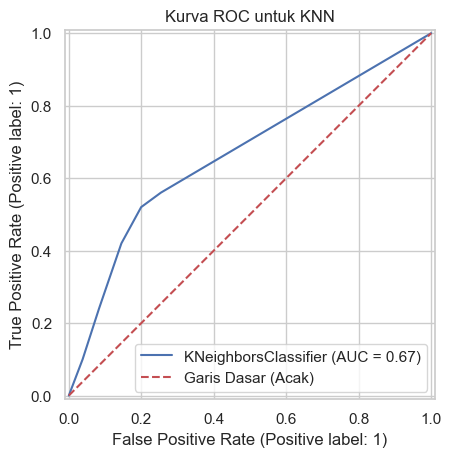

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('./healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model KNN
model_knn = KNeighborsClassifier(n_neighbors=5) 
model_knn.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_knn = model_knn.predict(X_test_scaled)
y_pred_proba_knn = model_knn.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model KNN =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn))
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"\nSkor AUC-ROC: {auc_score_knn:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_knn, X_test_scaled, y_test)
plt.title('Kurva ROC untuk KNN')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()


## Hyperparameter

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model KNN =====

Confusion Matrix:
[[889  83]
 [ 39  11]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.22      0.15        50

    accuracy                           0.88      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.92      0.88      0.90      1022


Skor AUC-ROC: 0.6214


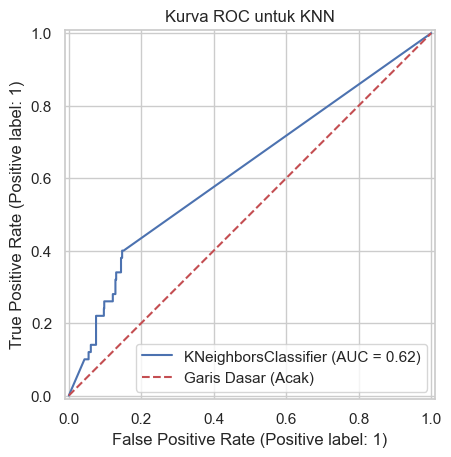

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('./healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model KNN dengan parameter yang sudah ditentukan
model_knn = KNeighborsClassifier(
    algorithm='auto',       
    leaf_size=20,           
    n_neighbors=3,          
    p=1,                    
    weights='distance'      
)
model_knn.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_knn = model_knn.predict(X_test_scaled)
y_pred_proba_knn = model_knn.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model KNN =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn))
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"\nSkor AUC-ROC: {auc_score_knn:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_knn, X_test_scaled, y_test)
plt.title('Kurva ROC untuk KNN')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()


## Normalisasi

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model KNN =====

Confusion Matrix:
[[840 132]
 [ 32  18]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.12      0.36      0.18        50

    accuracy                           0.84      1022
   macro avg       0.54      0.61      0.55      1022
weighted avg       0.92      0.84      0.88      1022


Skor AUC-ROC: 0.6470


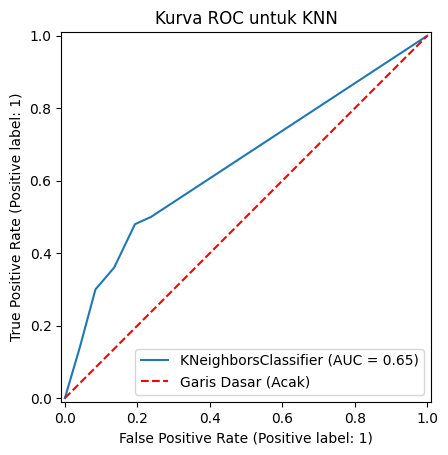

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('./healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model KNN
model_knn = KNeighborsClassifier(n_neighbors=5) 
model_knn.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_knn = model_knn.predict(X_test_scaled)
y_pred_proba_knn = model_knn.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model KNN =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn))
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"\nSkor AUC-ROC: {auc_score_knn:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_knn, X_test_scaled, y_test)
plt.title('Kurva ROC untuk KNN')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()


## Feature Engineering

Bentuk data latih setelah SMOTE: (7776, 25)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model KNN =====

Confusion Matrix:
[[876  96]
 [ 18  32]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       972
           1       0.25      0.64      0.36        50

    accuracy                           0.89      1022
   macro avg       0.61      0.77      0.65      1022
weighted avg       0.94      0.89      0.91      1022


Skor AUC-ROC: 0.8307


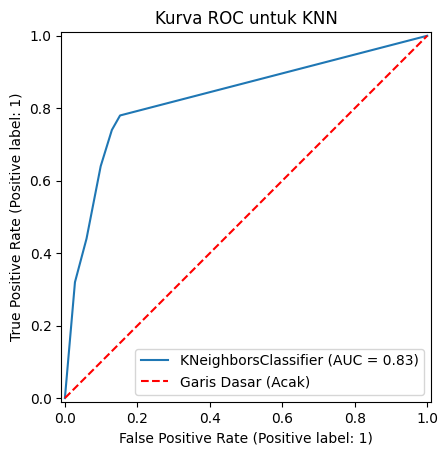

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('./stroke-data-feat-eng-one-hot.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model KNN
model_knn = KNeighborsClassifier(n_neighbors=5) 
model_knn.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_knn = model_knn.predict(X_test_scaled)
y_pred_proba_knn = model_knn.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model KNN =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn))
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"\nSkor AUC-ROC: {auc_score_knn:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_knn, X_test_scaled, y_test)
plt.title('Kurva ROC untuk KNN')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()
